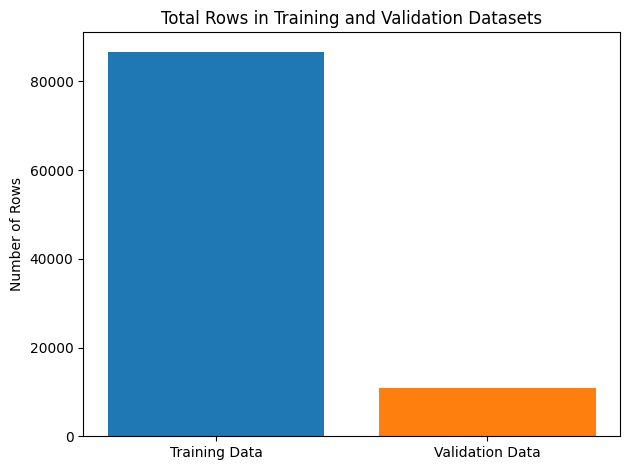

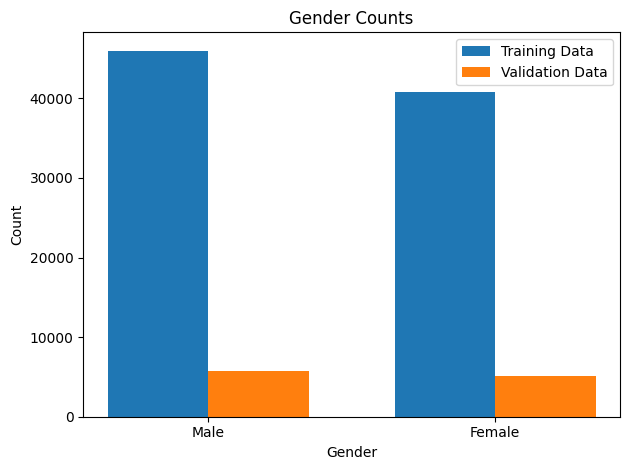

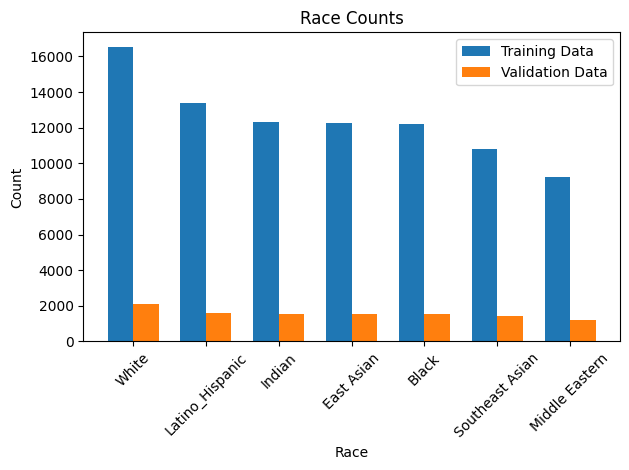

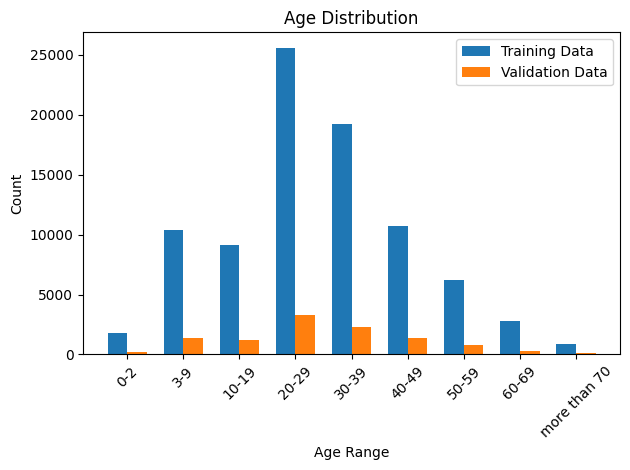

/var/folders/qq/_k5grsq97vz4bn2xgzvw12r40000gn/T/ipykernel_66510/1976004264.py:98: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_images = unique_pairs.apply(lambda group: group.sample(1)).reset_index(drop=True)


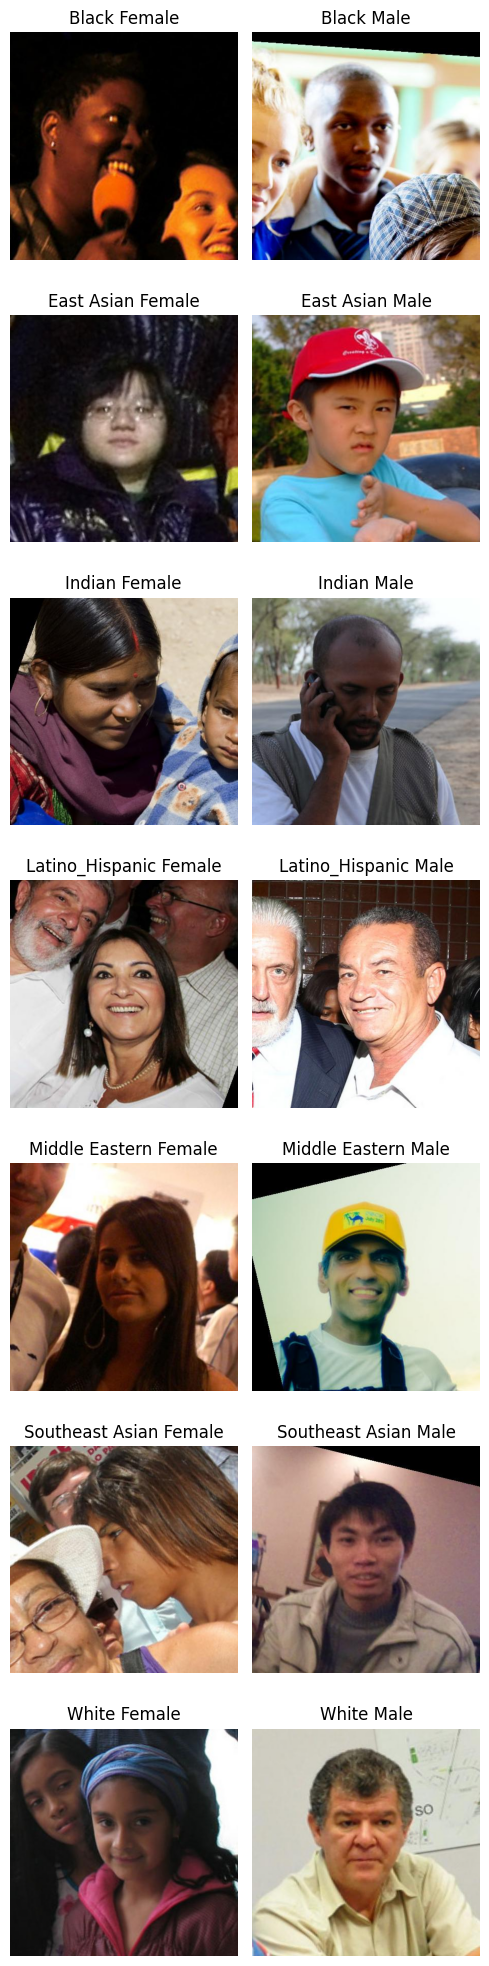

In [27]:
# Import necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from PIL import Image

# Set seed.
np.random.seed(2831)

# Load the CSV files.
train_label_path = "data/train_label.csv"
val_label_path = "data/val_label.csv"
train_df = pd.read_csv(train_label_path)
val_df = pd.read_csv(val_label_path)

# Plot total rows in train_label.csv and val_label.csv.
train_rows = len(train_df)
val_rows = len(val_df)
plt.figure()
plt.bar("Training Data", train_rows)
plt.bar("Validation Data", val_rows)
plt.title("Total Rows in Training and Validation Datasets")
plt.ylabel("Number of Rows")
plt.tight_layout()
plt.savefig("results/explore_data/row_counts.png")
plt.show()
plt.close()

# Plot gender counts for training and validation datasets.
gender_counts_train = train_df["gender"].value_counts()
gender_counts_val = val_df["gender"].value_counts()
plt.figure()
x = [0, 1]
width = 0.35
plt.bar([pos - width/2 for pos in x], gender_counts_train, width=width, label="Training Data")
plt.bar([pos + width/2 for pos in x], gender_counts_val, width=width, label="Validation Data")
plt.title("Gender Counts")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.xticks(ticks=x, labels=["Male", "Female"])
plt.legend()
plt.tight_layout()
plt.savefig("results/explore_data/gender_counts.png")
plt.show()
plt.close()

# Plot race counts for training and validation datasets
race_counts_train = train_df["race"].value_counts()
race_counts_val = val_df["race"].value_counts()
race_counts_train = race_counts_train.sort_values(ascending=False)
unique_races = race_counts_train.index.tolist()
race_counts_val = race_counts_val.reindex(unique_races, fill_value=0)
x = range(len(unique_races))
plt.figure()
plt.bar([pos - width/2 for pos in x], race_counts_train, width=width, label="Training Data")
plt.bar([pos + width/2 for pos in x], race_counts_val, width=width, label="Validation Data")
plt.title("Race Counts")
plt.ylabel("Count")
plt.xlabel("Race")
plt.xticks(ticks=x, labels=unique_races, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("results/explore_data/race_counts.png")
plt.show()
plt.close()

# Define a helper function to extract numeric values for sorting age ranges.
def sort_age_ranges(age_range):
    match = re.match(r"(\d+)-(\d+)", age_range)
    if match:
        return int(match.group(1))
    return float("inf")

# Plot age distribution for training and validation datasets.
age_counts_train = train_df["age"].value_counts()
age_counts_val = val_df["age"].value_counts()
unique_ages = list(set(age_counts_train.index).union(set(age_counts_val.index)))
unique_ages.sort(key=sort_age_ranges)
age_counts_train = age_counts_train.reindex(unique_ages, fill_value=0)
age_counts_val = age_counts_val.reindex(unique_ages, fill_value=0)
x = range(len(unique_ages))
plt.figure()
plt.bar([pos - width/2 for pos in x], age_counts_train, width=width, label="Training Data")
plt.bar([pos + width/2 for pos in x], age_counts_val, width=width, label="Validation Data")
plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlabel("Age Range")
plt.xticks(ticks=x, labels=unique_ages, rotation=45) 
plt.legend()
plt.tight_layout()
plt.savefig("results/explore_data/age_distribution.png")
plt.show()
plt.close()

# Plot images of unique race-gender pairs.
unique_pairs = train_df.groupby(["race", "gender"])
sampled_images = unique_pairs.apply(lambda group: group.sample(1)).reset_index(drop=True)
fig, axes = plt.subplots(7, 2, figsize=(5, 20))
axes = axes.flatten()
for i, (index, row) in enumerate(sampled_images.iterrows()):
    file_path = f"data/{row['file']}"
    try:
        img = Image.open(file_path)
        ax = axes[i]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"{row['race']} {row['gender']}")
    except Exception as e:
        print(f"Error {e} occurred while loading image {file_path}.")
plt.tight_layout()
plt.savefig("results/explore_data/sample_images.png")
plt.show()
